In [1]:
import pandas as pd
from textblob import TextBlob
import glob
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
plt.rcParams['figure.dpi']= 600

Let's start by loading the data of the government killings in the US. Every year/sector is in a separate file, so let's load them one by one, and also perform some quick cleaning while loading them.

In [65]:
def parse_number(number):
    '''
    Helper fuction used to pase numbers containing comma in the 100s.
    '''

    new_number= number.replace(",","")
    return float(new_number)

In [66]:
all_files = glob.glob("./datasets/spending_data/*.csv")
all_files.sort()
datasets = []

main_df = pd.DataFrame(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'All states combined', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],  columns =['State'])

for filename in all_files:
    print(filename)
    split=filename.split('_')
    year=split[-2]
    sector=split[-1][:-4]
    

    df = pd.read_csv(filename,skiprows=6)
    df.drop(df.tail(4).index, inplace = True) 
    df = df.drop(columns=df.columns.difference(['State','State and Local Spending']))
    
    df["State and Local Spending"] = df["State and Local Spending"].apply(lambda x: parse_number(x))
    df.columns= ["State", "{}_{}".format(year, sector)]
    
    
    main_df= pd.merge(main_df, df, on ="State")



./datasets/spending_data\usgs_state_2013_edu.csv
./datasets/spending_data\usgs_state_2013_health.csv
./datasets/spending_data\usgs_state_2013_police.csv
./datasets/spending_data\usgs_state_2014_edu.csv
./datasets/spending_data\usgs_state_2014_health.csv
./datasets/spending_data\usgs_state_2014_police.csv
./datasets/spending_data\usgs_state_2015_edu.csv
./datasets/spending_data\usgs_state_2015_health.csv
./datasets/spending_data\usgs_state_2015_police.csv
./datasets/spending_data\usgs_state_2016_edu.csv
./datasets/spending_data\usgs_state_2016_health.csv
./datasets/spending_data\usgs_state_2016_police.csv
./datasets/spending_data\usgs_state_2017_edu.csv
./datasets/spending_data\usgs_state_2017_health.csv
./datasets/spending_data\usgs_state_2017_police.csv
./datasets/spending_data\usgs_state_2018_edu.csv
./datasets/spending_data\usgs_state_2018_health.csv
./datasets/spending_data\usgs_state_2018_police.csv
./datasets/spending_data\usgs_state_2019_edu.csv
./datasets/spending_data\usgs_sta

In [67]:
main_df.head()

,State,2013_edu,2013_health,2013_police,2014_edu,2014_health,2014_police,2015_edu,2015_health,2015_police,...,2017_police,2018_edu,2018_health,2018_police,2019_edu,2019_health,2019_police,2020_edu,2020_health,2020_police
0,Alabama,3016.4,2400.1,501.0,2984.9,2451.7,507.2,3049.6,2516.7,530.3,...,542.8,3027.1,2767.2,563.0,3147.8,2770.9,583.4,3265.9,2788.6,603.6
1,Alaska,4977.5,3041.5,1240.3,4923.4,3024.5,1286.6,5036.4,3091.4,1356.8,...,1307.7,4422.2,3896.6,1556.8,4356.7,3988.2,1631.4,4315.1,4080.0,1700.8
2,Arizona,2193.0,1577.6,746.4,2265.4,1690.9,737.1,2058.9,1332.9,742.2,...,786.5,2231.0,1845.4,771.0,2291.2,1889.6,762.1,2349.8,1933.3,757.9
3,Arkansas,2772.2,1972.7,490.5,2758.8,2123.4,510.1,2766.2,2470.6,534.4,...,526.9,2918.8,2627.0,536.9,3032.0,2543.9,548.2,3142.2,2486.1,560.3
4,California,2748.0,2240.2,1029.5,2826.2,2444.7,1083.1,2995.8,3211.7,1106.1,...,1181.7,3616.4,4126.5,1244.0,3852.2,4403.7,1307.5,4075.0,4665.0,1369.1


Throughout all the notebook, we will be loading data that comes from different sources. So it's a good idea to homogenify some fields, such as the name of the State. We are defining a helper dictionary that will help matching different states of the us to unique identifying characters. 

In [68]:
main_df = main_df[main_df.State != "All states combined"]

us_state_abbrev = {    'Alabama': 'AL',    'Alaska': 'AK',    'American Samoa': 'AS',    'Arizona': 'AZ',    'Arkansas': 'AR',    'California': 'CA',    'Colorado': 'CO',    'Connecticut': 'CT',    'Delaware': 'DE',    'District of Columbia': 'DC',    'Florida': 'FL',    'Georgia': 'GA',    'Guam': 'GU',    'Hawaii': 'HI',    'Idaho': 'ID',    'Illinois': 'IL',    'Indiana': 'IN',    'Iowa': 'IA',    'Kansas': 'KS',    'Kentucky': 'KY',    'Louisiana': 'LA',    'Maine': 'ME',    'Maryland': 'MD',    'Massachusetts': 'MA',    'Michigan': 'MI',    'Minnesota': 'MN',    'Mississippi': 'MS',    'Missouri': 'MO',    'Montana': 'MT',    'Nebraska': 'NE',    'Nevada': 'NV',    'New Hampshire': 'NH',    'New Jersey': 'NJ',    'New Mexico': 'NM',    'New York': 'NY',    'North Carolina': 'NC',    'North Dakota': 'ND',    'Northern Mariana Islands':'MP',    'Ohio': 'OH',    'Oklahoma': 'OK',    'Oregon': 'OR',    'Pennsylvania': 'PA',    'Puerto Rico': 'PR',    'Rhode Island': 'RI',    'South Carolina': 'SC',    'South Dakota': 'SD',    'Tennessee': 'TN',    'Texas': 'TX',    'Utah': 'UT',    'Vermont': 'VT',    'Virgin Islands': 'VI',    'Virginia': 'VA',    'Washington': 'WA',    'West Virginia': 'WV',    'Wisconsin': 'WI',    'Wyoming': 'WY'}


main_df["State"] = main_df["State"].apply(lambda x: us_state_abbrev[x])

Since the different fundings do not change a lot from year to year, we will be taking the average value through the last 6 years for the fundings.

In [69]:
# Compute mean per each sector

main_df["mean_edu"]=main_df.filter(regex='edu').mean(axis=1)
main_df["mean_police"]=main_df.filter(regex='police').mean(axis=1)
main_df["mean_health"]=main_df.filter(regex='health').mean(axis=1)

main_df = main_df.drop(columns=main_df.columns.difference(['State','mean_edu', 'mean_police', 'mean_health']))

In [70]:
main_df.set_index("State", inplace=True)

In [71]:
main_df.head()

,mean_edu,mean_police,mean_health
State,,,
AL,3026.6875,545.4375,2648.4250
AK,4669.4625,1423.0625,3528.7125
AZ,2209.9375,757.7875,1721.4500
AR,2877.7125,529.2500,2451.8375
CA,3338.5500,1185.1375,3530.4750


In [72]:
main_df=main_df[['mean_police','mean_edu','mean_health']]

Great! The first dataset is ready. Let's quickly visualize the data we have, by sorting on the average police funding in every state.

In [73]:
main_df_sorted =  main_df.sort_values(by='mean_police', ascending=False)

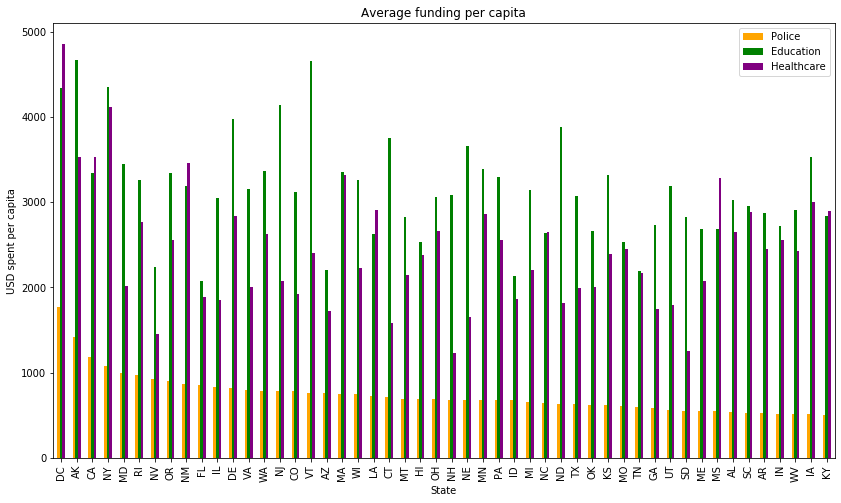

In [74]:
ax=main_df_sorted.plot.bar( rot=90, figsize=(14,8), title='Average funding per capita', color=["orange", "green", "purple"])
ax.set_ylabel("USD spent per capita")
ax.legend(["Police", "Education", "Healthcare"])
plt.savefig('./images/funding_sorted.jpg')

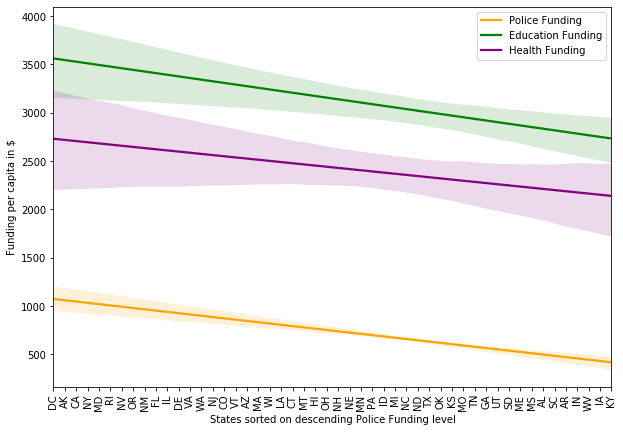

In [75]:
main_df_sorted = main_df_sorted.reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

plt.xticks(np.arange(0, len(main_df)))
ax.set_xticklabels(main_df_sorted.State)

sns.regplot(x=main_df_sorted.index, y='mean_police', data= main_df_sorted,fit_reg=True,scatter=False, color='orange', label="Police Funding")
sns.regplot(x=main_df_sorted.index, y='mean_edu', data= main_df_sorted,fit_reg=True,scatter=False, color = 'green', label="Education Funding")
sns.regplot(x=main_df_sorted.index, y='mean_health', data= main_df_sorted,fit_reg=True,scatter=False, color = 'purple', label="Health Funding")


plt.xticks(rotation=90)

ax.set_xlabel('States sorted on descending Police Funding level')
ax.set_ylabel('Funding per capita in $')
ax.legend()
plt.show()

### Get percentage of population by state

We want to include data on police killings in the US. But we want to make sure that we normalize this data. We are doing this because there are states such as California with 40M inhabitants, and we want to be able to compare the data with states with much smaller populations. To do this we are loading a dataset which includes the percentage of population per each state.  


Data downloaded from: https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population using https://wikitable2csv.ggor.de


In [76]:
population_pd = pd.read_csv('./datasets/popuations_by_state_wiki.csv')

In [77]:
population_pd.head()

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1,1,California,"39,512,223","37,254,523",6.1%,"+2,257,700",53,"718,404","745,514","702,885",11.96%
1,2,2,Texas,"28,995,881","25,145,561",15.3%,"+3,850,320",36,"763,050","805,441","698,503",8.68%
2,3,4,Florida,"21,477,737","18,801,310",14.2%,"+2,676,427",27,"740,611","795,472","696,468",6.44%
3,4,3,New York,"19,453,561","19,378,102",0.4%,"+75,459",27,"670,812","720,502","717,707",5.91%
4,5,6,Pennsylvania,"12,801,989","12,702,379",0.8%,"+99,610",18,"640,099","711,222","705,715",3.87%


Filter out the columns we don't need

In [78]:
population_pd = population_pd[["State", "Percent of the total U.S. population, 2018[note 3]"]]
population_pd.columns=["State", "Percentage of total population"]

Replace the name of the state with the abbreviations we prepared eariler so we have homegeneous data.

In [79]:
population_pd["State"] = population_pd["State"].apply(lambda x: us_state_abbrev[x])

In [80]:
population_pd["Percentage of total population"] = population_pd["Percentage of total population"].apply(lambda x: float(x[:-1])/100)

In [81]:
population_pd.head()

,State,Percentage of total population
0,CA,0.1196
1,TX,0.0868
2,FL,0.0644
3,NY,0.0591
4,PA,0.0387


Finally save the data as a dictionary so that it is easy to access it.

In [82]:
#Save data as dictionary
population_dict = population_pd.set_index('State').to_dict()['Percentage of total population']

### Normalize for racial distribution in each state.

We also want to normalize the data by the percentage of the race distribution in each state. As we were doing before, we want to be able to compare states with each other in terms of killings for each of the major racial groups. But it is had to compare a state such as Marruland that has a 30% Black population, with Colorado, that has 4% Black population. For this reason we will normalize the data once again by using the percentage of population of each race as a weight and multiply the numbers of deaths per each race in each state with these values. 

Data from: https://www.governing.com/gov-data/census/state-minority-population-data-estimates.html

In [83]:
race_per_state_df = pd.read_excel('./datasets/race_distribution_per_state.xlsx')

In [84]:
race_per_state_df.head()

,State,Hispanic (of any race),Non-Hispanic White,Non-Hispanic Black,Non-Hispanic Asian,Non-Hispanic American Indian
0,Alabama,0.041,0.655,0.267,0.013,0.005
1,Alaska,0.070,0.606,0.029,0.066,0.142
2,Arizona,0.314,0.547,0.041,0.032,0.039
3,Arkansas,0.074,0.723,0.152,0.016,0.006
4,California,0.391,0.370,0.055,0.144,0.004


In [85]:
race_per_state_df["Other"]=race_per_state_df["Non-Hispanic Asian"]+ race_per_state_df["Non-Hispanic American Indian"]

Let's keep only the 3 races we are interested in.

In [86]:
race_per_state_df.drop(columns=["Non-Hispanic Asian","Non-Hispanic American Indian" ], inplace=True)
race_per_state_df.columns=['State', 'Hispanic','White', 'Black', 'Other']

Once again replace the name of the states, with the abbreviations we have prepared

In [87]:
race_per_state_df.State = race_per_state_df.State.apply(lambda x: us_state_abbrev[x])

In [88]:
race_per_state_df.head()

,State,Hispanic,White,Black,Other
0,AL,0.041,0.655,0.267,0.018
1,AK,0.070,0.606,0.029,0.208
2,AZ,0.314,0.547,0.041,0.071
3,AR,0.074,0.723,0.152,0.022
4,CA,0.391,0.370,0.055,0.148


We have finally prepared a fully normalized dataframe of the distribution of population in the US. We have normalized both the total population per state, as well as the racial distribution per state. This dataframe will be used below, combined with the police violence data.

## Load, clean and prepare the police killing data

In [89]:
killing_df = pd.read_excel('./datasets/MPVDatasetDownload.xlsx')

In [90]:
killing_df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Pedro Martinez,66,Male,Hispanic,NaN,2020-11-18,NaN,Tyler,TX,NaN,...,Allegedly Armed,unknown weapon,other,not fleeing,no,6321.0,NaN,NaN,NaN,NaN
1,James Horton,42,Male,NaN,NaN,2020-11-17,NaN,Hart County,KY,NaN,...,Allegedly Armed,gun,attack,other,no,6322.0,NaN,NaN,NaN,NaN
2,Dustin James Acosta,28,Male,White,NaN,2020-11-17,NaN,St. Augustine,FL,NaN,...,Allegedly Armed,gun,attack,NaN,No,6320.0,NaN,NaN,NaN,NaN
3,Javon Brice,39,Male,NaN,NaN,2020-11-17,NaN,La Vergne,TN,NaN,...,Allegedly Armed,gun,attack,car,no,6319.0,NaN,NaN,NaN,NaN
4,Joshua D. Evans,32,Male,NaN,NaN,2020-11-16,NaN,Batesville,IN,NaN,...,Allegedly Armed,gun,attack,not fleeing,no,6314.0,NaN,NaN,NaN,NaN


Keep only the columns we are interested in

In [91]:
killing_df = killing_df[["Victim's race", "State", "Date of Incident (month/day/year)"]]
killing_df.columns=["Race", "State", "Date"]

killing_df = killing_df.dropna()

killing_df["Date"] = pd.to_datetime(killing_df["Date"]).apply(lambda x: x.year)

Let's filter out all the races we are not interested in

In [92]:
def other_race(race):
    if(race not in ["White", "Black", "Hispanic"]):
        return "Other"
    return race

In [93]:
killing_df.Race = killing_df.Race.apply(lambda x: other_race(x))

In [94]:
killing_df.Race.value_counts()

White       3769
Black       2158
Hispanic    1482
Other       1208
Name: Race, dtype: int64

In [95]:
killing_df.head()

,Race,State,Date
0,Hispanic,TX,2020
2,White,FL,2020
7,White,NH,2020
8,Hispanic,CA,2020
9,Other,TX,2020


Great! Now let's compute the averege number of police killings for each race and each state, for the last 8 years.

In [96]:
killings_per_state =killing_df.groupby(by=[ 'State', 'Race']).size()/(2020-2013+1) #GET AVG killings through the years
killings_per_state = killings_per_state.to_frame()
killings_per_state.reset_index(inplace=True)
killings_per_state.set_index('State', inplace=True)
killings_per_state.columns = ['Race', 'Deaths']
killings_per_state.reset_index(inplace=True)

In [97]:
killings_per_state.head()


,State,Race,Deaths
0,AK,Black,0.500
1,AK,Hispanic,0.125
2,AK,Other,2.500
3,AK,White,2.875
4,AL,Black,7.250


Let's pivot the table so that we have the races as columns. This way it will be easier to plot the data later.

In [98]:
killings_per_state_non_normalized = pd.pivot_table(killings_per_state, index="State",columns=['Race'])
killings_per_state_non_normalized = killings_per_state_non_normalized.fillna(0) #Fill data about missing races

killings_per_state_non_normalized.columns = killings_per_state_non_normalized.columns.droplevel()
killings_per_state_non_normalized=killings_per_state_non_normalized.drop(columns=["Other"])
killings_per_state_non_normalized.head()

Race,Black,Hispanic,White
State,,,
AK,0.500,0.125,2.875
AL,7.250,0.125,10.250
AR,4.375,0.375,8.375
AZ,4.125,16.750,19.125
CA,25.375,66.875,45.875


Great! Now it's a good idea to define a helper method that will be used to create the plots. 

In [99]:
def plot_killings_per_state_stacked(df):
    '''
    Create a stacked bar plot per each race in the dataframe. 
    Every bar represents th number of police killings in that state.
    '''
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)

    width = 0.35  

    ax.bar(df.index, df["Black"].to_list(), width, label='Black', color='black')
    ax.bar(df.index, df["White"].to_list(), width, bottom=df["Black"].to_list(),
           label='White', color='blue')
    ax.bar(df.index, df["Hispanic"].to_list(), width, bottom=df["White"]+df["Black"],
           label='Hispanic', color='red')


    plt.xlabel("State")
    plt.ylabel("Killings coefficient")
    plt.xticks(rotation=90)
    ax.legend()

    return plt

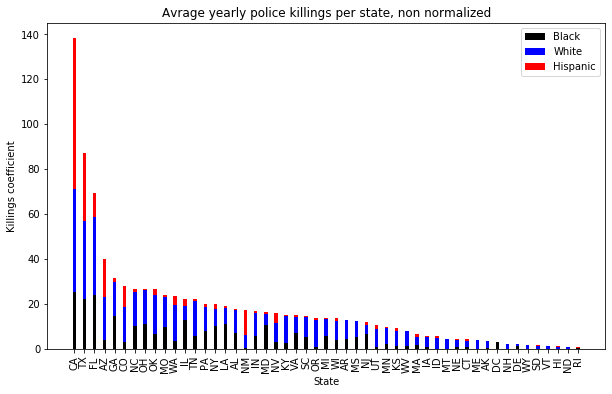

In [100]:

most_killings_sorted_index_non_normalized = killings_per_state_non_normalized.sum(axis=1).sort_values(ascending=False).index.to_list()
killings_per_state_non_normalized = killings_per_state_non_normalized.reindex(most_killings_sorted_index_non_normalized)

plt_non_normalized = plot_killings_per_state_stacked(killings_per_state_non_normalized)
plt_non_normalized.title("Avrage yearly police killings per state, non normalized")
plt_non_normalized.savefig('./images/killings_non_normalized.jpg')
plt_non_normalized.show()

Now that we have the average police killings per state and race, we can apply the two normalization factors we have prepared.

Let's start by normalizing by the density of the population of each state compared to the population in the US.

In [101]:
#Normalize deaths by state population
killings_per_state["Deaths"] = killings_per_state.apply(lambda x: x.Deaths * population_dict[x.State], axis=1)

In [102]:
killings_per_state.head()

,State,Race,Deaths
0,AK,Black,0.001100
1,AK,Hispanic,0.000275
2,AK,Other,0.005500
3,AK,White,0.006325
4,AL,Black,0.107300


Let's sort by number of deaths and plot the data.

In [103]:
killings_per_state_normalized_population = pd.pivot_table(killings_per_state, index="State",columns=['Race'])
killings_per_state_normalized_population = killings_per_state_normalized_population.fillna(0) #Fill data about missing races

killings_per_state_normalized_population.columns = killings_per_state_normalized_population.columns.droplevel()

In [104]:
killings_per_state_normalized_population.head()

Race,Black,Hispanic,Other,White
State,,,,
AK,0.001100,0.000275,0.00550,0.006325
AL,0.107300,0.001850,0.02405,0.151700
AR,0.039813,0.003413,0.01365,0.076213
AZ,0.089513,0.363475,0.17360,0.415013
CA,3.034850,7.998250,3.31890,5.486650


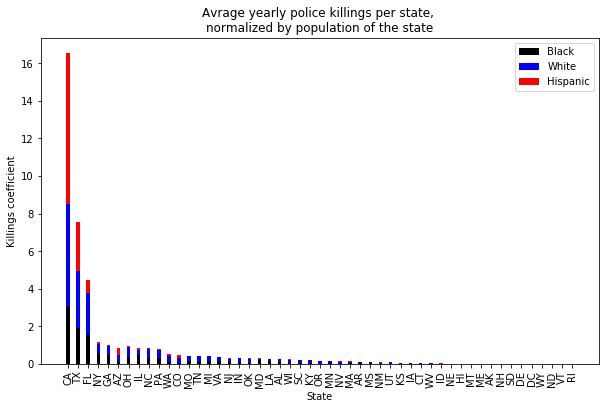

In [105]:
most_killings_sorted_index_population = killings_per_state_normalized_population.sum(axis=1).sort_values(ascending=False).index.to_list()
killings_per_state_normalized_population = killings_per_state_normalized_population.reindex(most_killings_sorted_index_population)

plt_plopulation_normalized = plot_killings_per_state_stacked(killings_per_state_normalized_population)

plt_plopulation_normalized.title("Avrage yearly police killings per state, \nnormalized by population of the state")
plt_plopulation_normalized.savefig('./images/killings_population_normalized.jpg')
plt_plopulation_normalized.show()

Now let's apply the second normalization factor. For each state, we will normalize the police killings proportionately to the racial distribution of that state. Let's define a helper function that does just that.

In [106]:
def normalize_per_race_density(row):
    '''
    Multiply the killing values of each race, whith the corresponding normalization factor of that state and race
    '''


    row.Black = row.Black * race_per_state_df[race_per_state_df["State"]==row.name]["Black"]
    row.White = row.White * race_per_state_df[race_per_state_df["State"]==row.name]["White"]
    row.Hispanic = row.Hispanic * race_per_state_df[race_per_state_df["State"]==row.name]["Hispanic"]
    row.Other = row.Other * race_per_state_df[race_per_state_df["State"]==row.name]["Other"]
  
    return row

In [107]:
killings_per_state_normalized_population_race = killings_per_state_normalized_population.apply(lambda x: normalize_per_race_density(x), axis=1)

In [108]:
killings_per_state_normalized_population_race.head()

Race,Black,Hispanic,Other,White
State,,,,
CA,0.166917,3.127316,0.491197,2.030061
TX,0.227893,1.034526,0.052015,1.263830
FL,0.238022,0.173107,0.017629,1.208321
NY,0.085569,0.026950,0.009862,0.244231
GA,0.145875,0.005342,0.008149,0.250902


***Finally, we have obtained a truly normalized dataframe of police killings in the US*** 

Let's plot one last time to see the diffrence from before

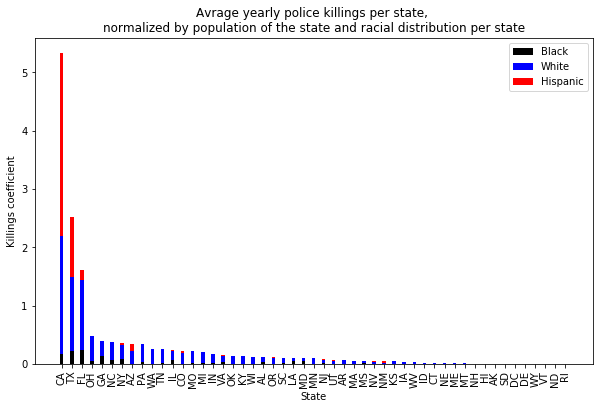

In [109]:
most_killings_sorted_index = killings_per_state_normalized_population_race.sum(axis=1).sort_values(ascending=False).index.to_list()
killings_per_state_normalized_population_race = killings_per_state_normalized_population_race.reindex(most_killings_sorted_index)

plt_plopulation_race_normalized = plot_killings_per_state_stacked(killings_per_state_normalized_population_race)

plt_plopulation_race_normalized.title("Avrage yearly police killings per state, \nnormalized by population of the state and racial distribution per state")
plt_plopulation_race_normalized.savefig('./images/killings_population_race_normalized.jpg')
plt_plopulation_race_normalized.show()

### Great! Now that we finally have all the information we need neatly cleaned and prepared, we can start combining the different datasets and see what results we get.

In [110]:
main_df.head()

,mean_police,mean_edu,mean_health
State,,,
AL,545.4375,3026.6875,2648.4250
AK,1423.0625,4669.4625,3528.7125
AZ,757.7875,2209.9375,1721.4500
AR,529.2500,2877.7125,2451.8375
CA,1185.1375,3338.5500,3530.4750


In [111]:
killings_per_state_normalized_population_race.head()

Race,Black,Hispanic,Other,White
State,,,,
CA,0.166917,3.127316,0.491197,2.030061
TX,0.227893,1.034526,0.052015,1.263830
FL,0.238022,0.173107,0.017629,1.208321
OH,0.047373,0.000327,0.001800,0.428220
GA,0.145875,0.005342,0.008149,0.250902


In [112]:
police_funding_sorted_index = main_df.sort_values(by='mean_police', ascending=False).index.to_list()

In [113]:
killings_per_state_normalized_most_killings = killings_per_state_normalized_population_race.reset_index()

In [114]:
killings_per_state_normalized_most_killings.head()

Race,State,Black,Hispanic,Other,White
0,CA,0.166917,3.127316,0.491197,2.030061
1,TX,0.227893,1.034526,0.052015,1.263830
2,FL,0.238022,0.173107,0.017629,1.208321
3,OH,0.047373,0.000327,0.001800,0.428220
4,GA,0.145875,0.005342,0.008149,0.250902


In [115]:
main_df_most_killings = main_df.reindex(most_killings_sorted_index)
main_df_most_killings = main_df_most_killings.reset_index()

In [116]:
main_df_most_police_funding.head()

,State,mean_police,mean_edu,mean_health
0,DC,1771.1750,4335.6750,4856.3000
1,AK,1423.0625,4669.4625,3528.7125
2,CA,1185.1375,3338.5500,3530.4750
3,NY,1084.5250,4356.3000,4110.7875
4,MD,993.2250,3443.6500,2014.4000


In [123]:
main_df_most_police_funding = main_df.reindex(police_funding_sorted_index)
killings_per_state_normalized_most_police_funding = killings_per_state_normalized_population_race.reindex(police_funding_sorted_index)

main_df_most_police_funding = main_df_most_police_funding.reset_index()
killings_per_state_normalized_most_police_funding = killings_per_state_normalized_most_police_funding.reset_index()

In [224]:
def plot(killings, spendings, onlyBlack=False, size =10):
    width = 0.4    # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

    ax2=ax.twiny()
#     if(onlyBlack==True):
#         ax.set_xscale('log')
    fig.set_size_inches(10, size)

    ax2.barh(2*killings.index-0.4, killings["Black"].to_list(), width, label='Black', color='black')
    if(onlyBlack==False):
        ax2.barh(2*killings.index-0.4, killings["White"].to_list(), width, left=killings["Black"].to_list(),
               label='White', color='blue')
        ax2.barh(2*killings.index-0.4, killings["Hispanic"].to_list(), width, left=killings["White"]+killings["Black"],
               label='Hispanic', color='red')

    ax.barh(2*spendings.index, spendings.mean_police, width, label="Police funding", color='orange')
    ax.barh(2*spendings.index+0.4, spendings.mean_edu, width, label="Education funding", color='green')
    ax.barh(2*spendings.index+0.8, spendings.mean_health, width, label="Health funding", color='purple')


    plt.yticks(np.arange(0, len(killings)*2, 2.0)[::-1])
    plt.yticks(rotation=90)
    ax2.set_yticklabels(spendings.State[::-1])
    if(onlyBlack==False):
        ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
   
    ax.legend(loc='lower right')

    ax2.set_xlabel('Normalized killings per race')
    ax.set_xlabel('$ per capita')
    plt.gca().invert_yaxis()

    return plt

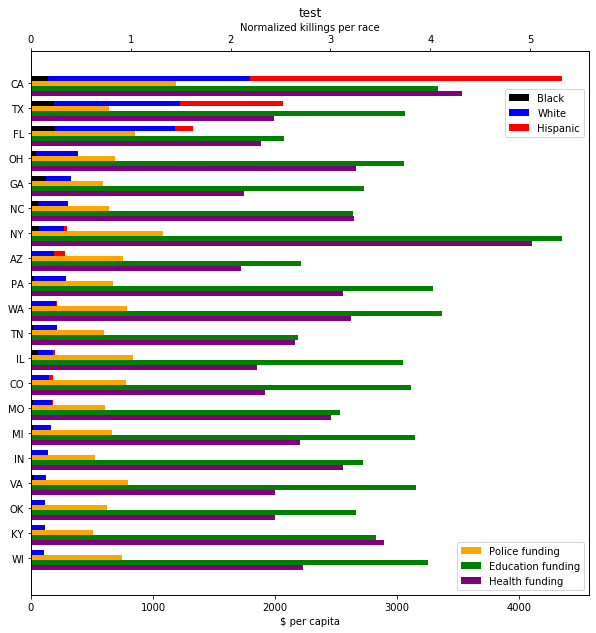

In [226]:
plt = plot(killings_per_state_normalized_most_killings[:20], main_df_most_killings[:20],False)
plt.title('test')
plt.show()

In [212]:
killings_per_state_normalized_most_killings[:20].head()

Race,State,Black,Hispanic,Other,White
0,CA,0.166917,3.127316,0.491197,2.030061
1,TX,0.227893,1.034526,0.052015,1.263830
2,FL,0.238022,0.173107,0.017629,1.208321
3,OH,0.047373,0.000327,0.001800,0.428220
4,GA,0.145875,0.005342,0.008149,0.250902


In [205]:
killings_per_state_normalized_most_police_funding.head()

Race,State,Black,Hispanic,Other,White
0,DC,0.002854,0.000000,0.000022,0.000096
1,AK,0.000032,0.000019,0.001144,0.003833
2,CA,0.166917,3.127316,0.491197,2.030061
3,NY,0.085569,0.026950,0.009862,0.244231
4,MD,0.057837,0.001848,0.001510,0.044071


In [214]:
killings_per_state_normalized_most_police_funding[:10].append(killings_per_state_normalized_most_police_funding[-10:]).reset_index(drop=True).head()

Race,State,Black,Hispanic,Other,White
0,DC,0.002854,0.000000,0.000022,0.000096
1,AK,0.000032,0.000019,0.001144,0.003833
2,CA,0.166917,3.127316,0.491197,2.030061
3,NY,0.085569,0.026950,0.009862,0.244231
4,MD,0.057837,0.001848,0.001510,0.044071


[0.0028539, 3.19e-05, 0.16691675000000003, 0.08556941249999998, 0.05783715, 6.48e-05, 0.00255875, 0.000257175, 5.6699999999999996e-05, 0.23802239999999997, 0.0, 6e-06, 0.0187605, 0.028649100000000004, 0.021667800000000004, 0.0060515, 0.010685799999999999, 0.0002949375, 0.00027431250000000003, 0.0028350000000000003]


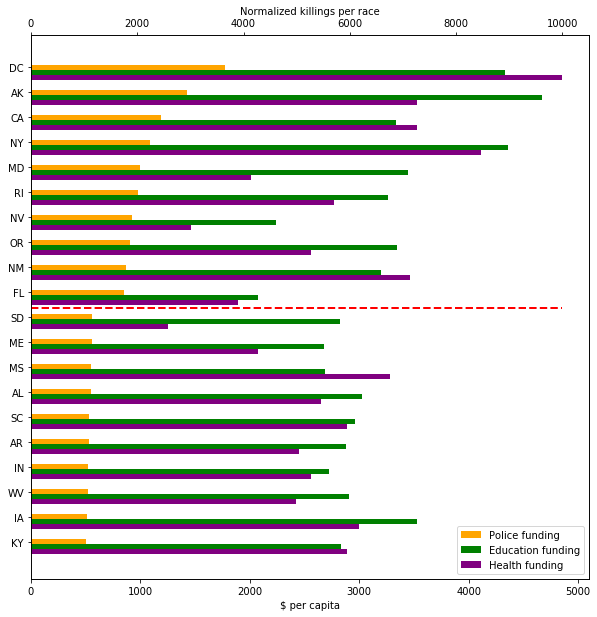

In [221]:
plt2 = plot(killings_per_state_normalized_most_police_funding[:10].append(killings_per_state_normalized_most_police_funding[-10:]).reset_index(), main_df_most_police_funding[:10].append( main_df_most_police_funding[-10:]).reset_index(), True)

plt2.hlines(y=19.3, xmin=0, xmax=10000,linewidth=2, linestyle='--', color="red")

plt2.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

plt.xticks(np.arange(0, len(main_df_most_police_funding)))
ax.set_xticklabels(main_df_most_police_funding.State)

sns.regplot(x=main_df_most_police_funding.index, y='mean_police', data= main_df_most_police_funding,fit_reg=True,scatter=False, color='orange', label="Police Funding")
sns.regplot(x=main_df_most_police_funding.index, y='mean_edu', data= main_df_most_police_funding,fit_reg=True,scatter=False, color = 'green', label="Education Funding")
sns.regplot(x=main_df_most_police_funding.index, y='mean_health', data= main_df_most_police_funding,fit_reg=True,scatter=False, color = 'purple', label="Health Funding")


plt.xticks(rotation=90)

ax.set_xlabel('States sorted on descending Police Funding level')
ax.set_ylabel('Funding per capita in $')
ax.legend()
plt.show()